<a href="https://colab.research.google.com/github/Joon-hub/DataScience_Concepts/blob/main/LDA_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


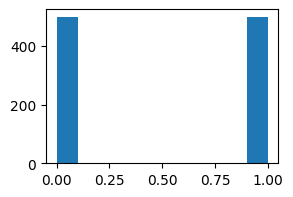

In [59]:
# plot the distrbution of y
plt.figure(figsize=(3, 2))
plt.hist(y)
plt.show()

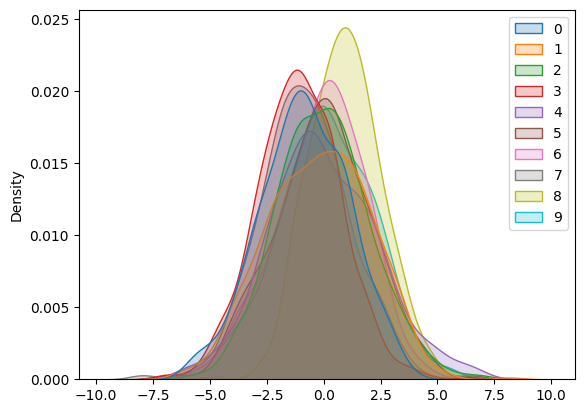

In [70]:
sns.kdeplot(data=X[y == 0], label="Class 0", fill=True);


<ipython-input-69-029415e77ad9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X[y == 1], label="Class 1", shade=True);


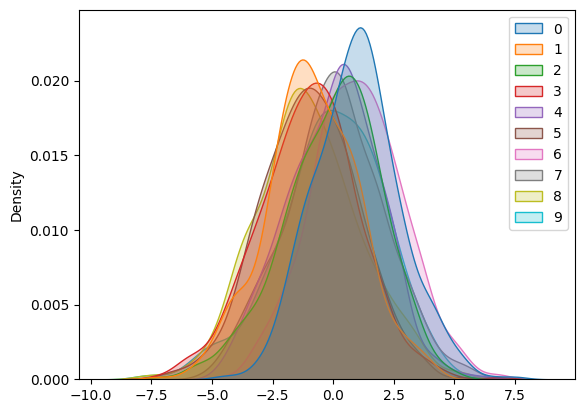

In [69]:
sns.kdeplot(data=X[y == 1], label="Class 1", shade=True);


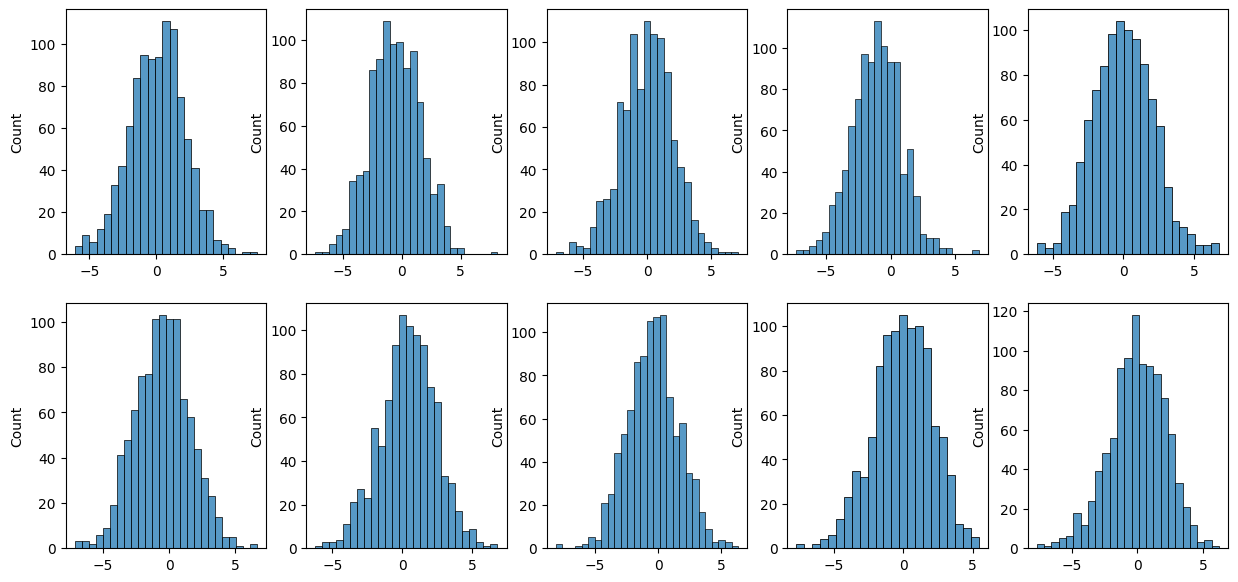

In [48]:
# plot the distribution of X variables
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axs.ravel()):
    sns.histplot(X[:, i], ax=ax)

In [49]:
# Define model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

#split the dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)


(600, 10) (200, 10) (200, 10)


In [50]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score


model.fit(X_train, y_train)


# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('training Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

training Mean Accuracy: 0.894 (0.024)


In [51]:
# accuracy of model on test set
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.88

In [52]:
# accuracy on test set
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [53]:
# prediction on single row
row = X_test[0]
yhat = model.predict([row])
print('Actual Class: %d' % y_test[0])
print('Predicted Class: %d' % yhat[0])

Actual Class: 0
Predicted Class: 0


### Hyperparameter Tunning

In [54]:
# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.892
Config: {'solver': 'svd'}


### Regularized Discriminant Analysis

In [56]:
# define grid
grid = dict()
grid['solver'] = ['lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.892
Config: {'shrinkage': 0.0, 'solver': 'lsqr'}


Predictions using best_model

In [57]:
# After performing GridSearchCV, access the best model
best_model = search.best_estimator_

# Predict on the validation set
y_val_pred = best_model.predict(X_val)  # X_val is your validation feature set
y_val_proba = best_model.predict_proba(X_val)  # For probability estimates

# Predict on the test set
y_test_pred = best_model.predict(X_test)  # X_test is your test feature set
y_test_proba = best_model.predict_proba(X_test)  # For probability estimates

# Optionally, print results or evaluate the model performance
from sklearn.metrics import accuracy_score

# Evaluate accuracy on validation and test sets
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Validation Accuracy: 0.880
Test Accuracy: 0.900


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        96
           1       0.87      0.95      0.91       104

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

